# Example of using Gaussian Processes as an uncertainty model

In [11]:
import matplotlib.pyplot as plt
import numpy
import sklearn.datasets
import sklearn.model_selection
import sklearn.preprocessing

import gandy.models.gps

## A regression task, using the boston dataset

In [13]:
## loading the data
Xs, Ys = sklearn.datasets.load_boston(return_X_y=True)
Xsr, Xst, Ysr, Yst = sklearn.model_selection.train_test_split(Xs, Ys, train_size = 0.8)
## normalizing it
norm = sklearn.preprocessing.Normalizer()
Xsr = norm.fit_transform(Xsr)
Xst = norm.transform(Xst)

In [14]:
print('X data: ', Xs.shape, Xs.dtype)
print('Y data: ', Ys.shape, Ys.dtype)

X data:  (506, 13) float64
Y data:  (506,) float64


We have 13 features and 1 target.

In [15]:
## instantialize our uncertainty model
## give it the shapes that we need
gpr = gandy.models.gps.ucGaussianProcess.R(xshape=(13,), yshape=(1,))

In [16]:
## fit the model
gpr.train(Xsr, Ysr)

In [20]:
## make predictions
preds, uncs, flags = gpr.predict(Xst, uc_threshold = 0.01)

/Users/ek/miniconda3/envs/gandy_env/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Text(0.5, 1.0, 'Certain and uncertain predictions, boston data')

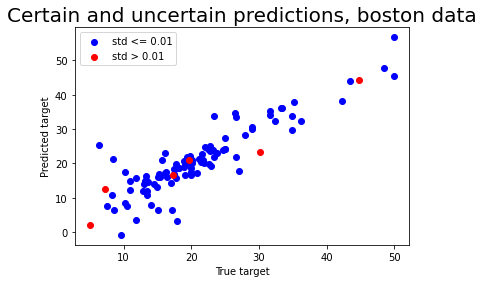

In [31]:
fig, ax = plt.subplots()
ax.scatter(Yst.reshape(-1,1)[flags == False],
           preds[flags == False],
           c='b', label='std <= 0.01')
ax.scatter(Yst.reshape(-1,1)[flags == True],
           preds[flags == True],
           c='r', label='std > 0.01')
ax.set_xlabel('True target')
ax.set_ylabel('Predicted target')
plt.legend()
ax.set_title('Certain and uncertain predictions, boston data', size=20)

## A classification task, using the boston dataset

In [32]:
## loading the data
Xs, Ys = sklearn.datasets.load_iris(return_X_y=True)
Xsr, Xst, Ysr, Yst = sklearn.model_selection.train_test_split(Xs, Ys, train_size = 0.8)
## normalizing it
norm = sklearn.preprocessing.Normalizer()
Xsr = norm.fit_transform(Xsr)
Xst = norm.transform(Xst)

In [33]:
print('X data: ', Xs.shape, Xs.dtype)
print('Y data: ', Ys.shape, Ys.dtype)

X data:  (150, 4) float64
Y data:  (150,) int64


In [37]:
## instantialize our uncertainty model
## give it the shapes that we need
gpc = gandy.models.gps.ucGaussianProcess.C(xshape=(4,), yshape=(1,))

In [38]:
## fit the model
gpr.train(Xsr, Ysr)

In [42]:
## make predictions
preds, uncs, flags = gpr.predict(Xst, uc_threshold = 0.001)

/Users/ek/miniconda3/envs/gandy_env/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [70]:
counts, edges = numpy.histogram(flags, bins=2, density=True)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


([<matplotlib.patches.Wedge at 0x1a2924208>,
 [Text(-1.0759623636622138, 0.22870284646768646, 'precise'),
  Text(1.0759623690153899, -0.22870282128297006, 'uncertain')])

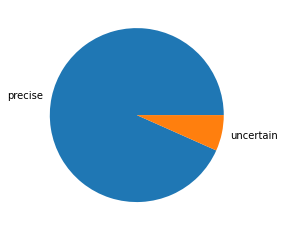

In [71]:
fig, ax = plt.subplots()
ax.pie(counts, labels=['precise', 'uncertain'])